# 1.Instalação e importação de Bibliotecas

In [1]:
# Baixando a biblioteca geobr
!pip install geobr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [2]:
# Baixando a biblioteca dbnomics
!pip install dbnomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00


In [3]:
# Importação de bibliotecas

# data manipulation
import os
import pandas as pd
import geobr
import geopandas as qpd
from dbnomics import fetch_series

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# options
plt.style.use('ggplot')

#2.Carga do banco de dados

## 2.1 Tabela csv de expotação por estados com descrição das mercadorias

http://comexstat.mdic.gov.br/pt/home

In [ ]:
# Carregando a tabela para análise
export_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Exportação/EXP/Estados/EXP_1997_2020_UF.csv', sep = ';')

## 2.2 Tabela de exportação e importação total do Brasil

fonte: https://db.nomics.world/

link de exportação: https://db.nomics.world/FAO/TP/10.21.5922

link de importação: https://db.nomics.world/FAO/TP/10.21.5622

In [ ]:
data_total = fetch_series([
    'FAO/TP/10.21.5922', #Total Merchandise Trade - Export value for Brazil,
    'FAO/TP/10.21.5622'  #Total Merchandise Trade - Import Value for Brazil
    ])

# 3.Análise exploratória de dados

##3.1 Tabela export_data

In [ ]:
# Visualizando os primeiros 5 registros
export_data.head()

,Ano,UF do Produto,Codigo SH2,Descrição SH2,Valor FOB (US$)
0,2020,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",17571575741
1,2020,Pará,26,"Minerios, escórias e cinzas",16311755239
2,2020,Minas Gerais,26,"Minerios, escórias e cinzas",9897540340
3,2020,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",7701252124
4,2020,São Paulo,17,Açúcares e produtos de confeitaria,5538979962


In [ ]:
# Visualizando os últimos 5 registros
export_data.tail()

,Ano,UF do Produto,Codigo SH2,Descrição SH2,Valor FOB (US$)
41848,1997,Maranhão,96,Obras diversas,11
41849,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9
41850,1997,Santa Catarina,45,Cortiça e suas obras,9
41851,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9
41852,1997,Maranhão,83,Obras diversas de metais comuns,6


In [ ]:
# Informações da tabela .info()
export_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41853 entries, 0 to 41852
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano              41853 non-null  int64 
 1   UF do Produto    41853 non-null  object
 2   Codigo SH2       41853 non-null  int64 
 3   Descrição SH2    41853 non-null  object
 4   Valor FOB (US$)  41853 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
# Verificação de valores nulos (NaN) .isna()
export_data.isna().sum()

Ano                0
UF do Produto      0
Codigo SH2         0
Descrição SH2      0
Valor FOB (US$)    0
dtype: int64

In [ ]:
# Verificação de linhas duplicadas .duplicated()
export_data.duplicated().sum()

0

In [ ]:
# Nomes das colunas para ver se tem algum espaçamento .columns
list(export_data.columns)

['Ano', 'UF do Produto', 'Codigo SH2', 'Descrição SH2', 'Valor FOB (US$)']

******************************************************************************

In [ ]:
# Quantidade de itens únicos nas colunas do tipo categórica com select_dtypes()
export_data.select_dtypes(object).nunique()

UF do Produto    32
Descrição SH2    97
dtype: int64

In [ ]:
# Valores categoricos da coluna 'UF do Produto'
export_data['UF do Produto'].unique().tolist()

['Rio de Janeiro',
 'Pará',
 'Minas Gerais',
 'Mato Grosso',
 'São Paulo',
 'Paraná',
 'Rio Grande do Sul',
 'Santa Catarina',
 'Goiás',
 'Mato Grosso do Sul',
 'Bahia',
 'Espírito Santo',
 'Maranhão',
 'Ceará',
 'Tocantins',
 'Rondônia',
 'Não Declarada',
 'Pernambuco',
 'Piauí',
 'Alagoas',
 'Amapá',
 'Rio Grande do Norte',
 'Amazonas',
 'Distrito Federal',
 'Paraíba',
 'Roraima',
 'Sergipe',
 'Acre',
 'Reexportação',
 'Consumo de Bordo',
 'Mercadoria Nacionalizada',
 'Zona Não Declarada']

In [ ]:
# Valores categoricos da coluna 'Descrição SH2'
export_data['Descrição SH2'].unique().tolist()

['Combustíveis minerais, óleos minerais e produtos da sua destilação; matérias betuminosas; ceras minerais',
 'Minerios, escórias e cinzas',
 'Sementes e frutos oleaginosos; grãos, sementes e frutos diversos; plantas industriais ou medicinais; palhas e forragens',
 'Açúcares e produtos de confeitaria',
 'Reatores nucleares, caldeiras, máquinas, aparelhos e instrumentos mecânicos, e suas partes',
 'Café, chá, mate e especiarias',
 'Cereais',
 'Veículos automóveis, tratores, ciclos e outros veículos terrestres, suas partes e acessórios',
 'Ferro fundido, ferro e aço',
 'Carnes e miudezas, comestíveis',
 'Aeronaves e aparelhos espaciais, e suas partes',
 'Algodão',
 'Resíduos e desperdícios das indústrias alimentares; alimentos preparados para animais',
 'Pérolas naturais ou cultivadas, pedras preciosas ou semipreciosas e semelhantes, metais preciosos, metais folheados ou chapeados de metais preciosos (plaquê), e suas obras; bijuterias; moedas',
 'Pastas de madeira ou de outras matérias f

In [ ]:
# Quantidade de registros agrupado por estado com groupby()
uf = export_data.groupby(['UF do Produto']).size()
uf

UF do Produto
Acre                         541
Alagoas                      732
Amapá                        351
Amazonas                    1334
Bahia                       1831
Ceará                       1705
Consumo de Bordo              33
Distrito Federal             985
Espírito Santo              1643
Goiás                       1681
Maranhão                     713
Mato Grosso                 1139
Mato Grosso do Sul          1615
Mercadoria Nacionalizada    1632
Minas Gerais                2219
Não Declarada               2039
Paraná                      2226
Paraíba                     1064
Pará                        1487
Pernambuco                  1634
Piauí                        554
Reexportação                1007
Rio Grande do Norte         1132
Rio Grande do Sul           2281
Rio de Janeiro              2250
Rondônia                    1012
Roraima                      510
Santa Catarina              2204
Sergipe                      634
São Paulo                   2

In [ ]:
# Quantidade de itens únicos nas colunas do tipo int com select_dtypes()
export_data.select_dtypes(int).nunique()

Ano                   24
Codigo SH2            97
Valor FOB (US$)    37818
dtype: int64

In [ ]:
# Verificando a coluna 'Valor FOB (US$)' para ver se tem algum valor negativo com .describe()
export_data['Valor FOB (US$)'].describe()

count    4.185300e+04
mean     8.715281e+07
std      5.416093e+08
min      0.000000e+00
25%      2.673800e+04
50%      6.321540e+05
75%      1.177400e+07
max      2.122634e+10
Name: Valor FOB (US$), dtype: float64

## 3.2 Tabela data_total

In [ ]:
# Visualizando os primeiros 5 registros
data_total.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,item,area,element,Item,Area,Element
0,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1961,1961-01-01,1402970.0,1402970.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1962,1962-01-01,1214185.0,1214185.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
2,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1963,1963-01-01,1406480.0,1406480.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
3,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1964,1964-01-01,1429790.0,1429790.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
4,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1965,1965-01-01,1595479.0,1595479.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value


In [ ]:
# Visualizando os últimos 5 registros
data_total.tail()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,item,area,element,Item,Area,Element
54,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2015,2015-01-01,178832000.0,178832000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
55,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2016,2016-01-01,143411000.0,143411000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
56,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2017,2017-01-01,157543000.0,157543000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
57,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2018,2018-01-01,188563933.0,188563933.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
58,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2019,2019-01-01,184370120.0,184370120.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value


In [ ]:
# Informações da tabela .info()
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 58
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   @frequency       118 non-null    object        
 1   provider_code    118 non-null    object        
 2   dataset_code     118 non-null    object        
 3   dataset_name     118 non-null    object        
 4   series_code      118 non-null    object        
 5   series_name      118 non-null    object        
 6   original_period  118 non-null    object        
 7   period           118 non-null    datetime64[ns]
 8   original_value   118 non-null    float64       
 9   value            118 non-null    float64       
 10  item             118 non-null    object        
 11  area             118 non-null    object        
 12  element          118 non-null    object        
 13  Item             118 non-null    object        
 14  Area             118 non-null    object    

In [ ]:
# Verificação de valores nulos (NaN) .isna()
data_total.isna().sum()

@frequency         0
provider_code      0
dataset_code       0
dataset_name       0
series_code        0
series_name        0
original_period    0
period             0
original_value     0
value              0
item               0
area               0
element            0
Item               0
Area               0
Element            0
dtype: int64

In [ ]:
# Verificação de linhas duplicadas .duplicated()
data_total.duplicated().sum()

0

In [ ]:
# Nomes das colunas para ver se tem algum espaçamento .columns
list(data_total.columns)

['@frequency',
 'provider_code',
 'dataset_code',
 'dataset_name',
 'series_code',
 'series_name',
 'original_period',
 'period',
 'original_value',
 'value',
 'item',
 'area',
 'element',
 'Item',
 'Area',
 'Element']

In [ ]:
# Verificando se há valores negativos na coluna value .describe()
data_total['value'].describe()

count    1.180000e+02
mean     6.565215e+07
std      7.751988e+07
min      1.096423e+06
25%      1.225487e+07
50%      2.726528e+07
75%      9.129730e+07
max      2.560399e+08
Name: value, dtype: float64

In [ ]:
# Verificando os valores da coluna Element .unique()
data_total['Element'].unique()

array(['Export Value', 'Import Value'], dtype=object)

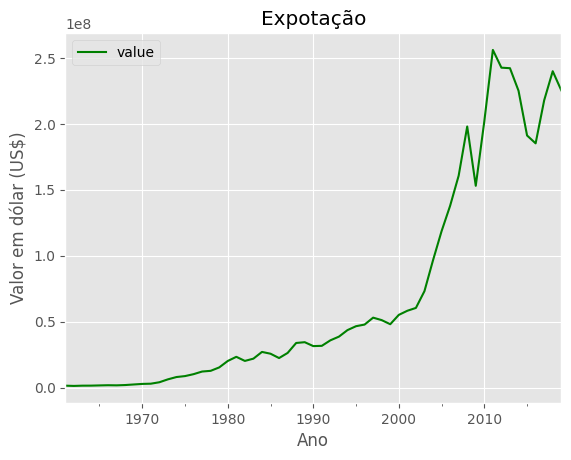

In [ ]:
# Visão macro das exportações
# .query('Element == "Export Value"') - filtrando apenas os valores com "Export Value" da coluna Element
# .set_index('period') - definindo a coluna 'period' com índice
data_total.query('Element == "Export Value"')[['period','value']].set_index('period')\
.plot(color = 'green')
plt.title('Expotação')
plt.xlabel('Ano')
plt.ylabel('Valor em dólar (US$)');

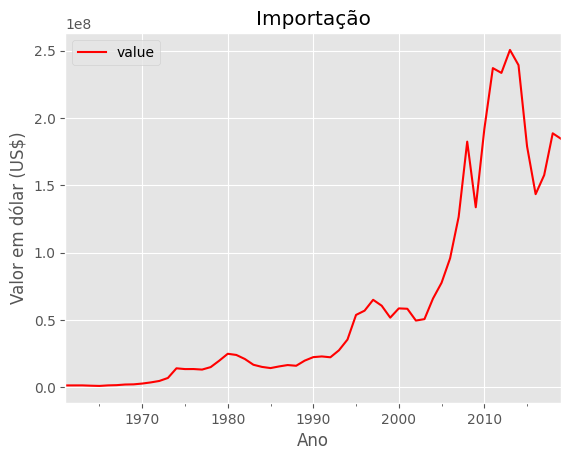

In [ ]:
# Visão macro das importações
# .query('Element == "Import Value"') - filtrando apenas os valores com "Import Value" da coluna Element
# .set_index('period') - definindo a coluna 'period' com índice
data_total.query('Element == "Import Value"')[['period','value']].set_index('period')\
.plot(color = 'red')
plt.title('Importação')
plt.xlabel('Ano')
plt.ylabel('Valor em dólar (US$)');

#4.Transformação e tratamento de dados

##4.1 Tabela export_data

In [ ]:
# Dicionário com as abreviações para criar um campo novo com as siglas dos estados
uf_cod = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Paraná': 'PR',
    'Paraíba': 'PB',
    'Pará': 'PA',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'Sergipe': 'SE',
    'São Paulo': 'SP',
    'Tocantins': 'TO'
}

In [ ]:
len(uf_cod)

27

In [ ]:
# Verificando o nome das colunas
export_data.columns.tolist()

['Ano', 'UF do Produto', 'Codigo SH2', 'Descrição SH2', 'Valor FOB (US$)']

In [ ]:
# Montando um dicionário com novos nomes para as colunas
cols_to_rename = {
    'Ano': 'ano',
    'UF do Produto': 'UF',
    'Codigo SH2': 'SH2',
    'Descrição SH2': 'SH2_detalhe',
    'Valor FOB (US$)': 'valor'
}

In [ ]:
# Alterando o nome das colunas com .rename(columns) | inplace = True para fazer a modificação efetiva na base de dados
export_data.rename(columns = cols_to_rename, inplace = True)

In [ ]:
# Verificando a tabela com os novos nomes das colunas
export_data.head(1)

,ano,UF,SH2,SH2_detalhe,valor
0,2020,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",17571575741


In [ ]:
# Criando uma nova coluna [UF_code] com as abreviações dos estados
# Foi utilizado a função .map() para alterar cada registro na coluna UF, conforme dicionário passado no parâmetro
export_data['UF_code'] = export_data['UF'].map(uf_cod) # uf_cod é dicionário acima com as abreviações

### 4.1.1 export_data

In [ ]:
# Verificando a nova coluna UF_code
export_data.head()

,ano,UF,SH2,SH2_detalhe,valor,UF_code
0,2020,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",17571575741,RJ
1,2020,Pará,26,"Minerios, escórias e cinzas",16311755239,PA
2,2020,Minas Gerais,26,"Minerios, escórias e cinzas",9897540340,MG
3,2020,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",7701252124,MT
4,2020,São Paulo,17,Açúcares e produtos de confeitaria,5538979962,SP


In [ ]:
export_data['ano'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997])

In [ ]:
# Análise dos valores únicos da coluna UF_code
export_data['UF_code'].unique()

array(['RJ', 'PA', 'MG', 'MT', 'SP', 'PR', 'RS', 'SC', 'GO', 'MS', 'BA',
       'ES', 'MA', 'CE', 'TO', 'RO', nan, 'PE', 'PI', 'AL', 'AP', 'RN',
       'AM', 'DF', 'PB', 'RR', 'SE', 'AC'], dtype=object)

In [ ]:
# Verificando a quantidade de valores únicos da coluna UF_code
export_data['UF_code'].unique().size

28

##4.2 Tabela data_total

In [ ]:
# Criando uma tabela com os valores de exportação
export_br = data_total.query('Element == "Export Value"')['value']

In [ ]:
export_br.head()

0    1402970.0
1    1214185.0
2    1406480.0
3    1429790.0
4    1595479.0
Name: value, dtype: float64

In [ ]:
# Criando uma tabela com os valores de importação
import_br = data_total.query('Element == "Import Value"')['value']

In [ ]:
import_br.head()

0    1460093.0
1    1475047.0
2    1486848.0
3    1263451.0
4    1096423.0
Name: value, dtype: float64

In [ ]:
# Criando uma tabela de saldo (exportação - importação)
saldo = export_br - import_br

In [ ]:
saldo.head()

0    -57123.0
1   -260862.0
2    -80368.0
3    166339.0
4    499056.0
Name: value, dtype: float64

In [ ]:
# Criando uma talela com a concatenanção (junção) da tabela export_br, import_br e saldo pd.concat()
historical_data = pd.concat([
    export_br,
    import_br,
    saldo
], axis = 1) # foi usado o parâmetro axis = 1 para "juntar" uma coluna ao lado da outra

In [ ]:
historical_data.head()

,value,value,value
0,1402970.0,1460093.0,-57123.0
1,1214185.0,1475047.0,-260862.0
2,1406480.0,1486848.0,-80368.0
3,1429790.0,1263451.0,166339.0
4,1595479.0,1096423.0,499056.0


In [ ]:
# Renomeando as colunas .columns
historical_data.columns = ['exportacao', 'importacao', 'saldo']

In [ ]:
historical_data.head(1)

,exportacao,importacao,saldo
0,1402970.0,1460093.0,-57123.0


In [ ]:
# Definindo o índice da tabela historical_data aproveitando os valores da coluna 'period' da tabela data_total
historical_data.index = data_total.query('Element == "Export Value"')['period']

### 4.2.1 historical_data

In [ ]:
historical_data.head()

,exportacao,importacao,saldo
period,,,
1961-01-01,1402970.0,1460093.0,-57123.0
1962-01-01,1214185.0,1475047.0,-260862.0
1963-01-01,1406480.0,1486848.0,-80368.0
1964-01-01,1429790.0,1263451.0,166339.0
1965-01-01,1595479.0,1096423.0,499056.0


In [ ]:
# Renomeando o a coluna de índice
historical_data.index.name = 'ano'

In [ ]:
historical_data.head(1)

,exportacao,importacao,saldo
ano,,,
1961-01-01,1402970.0,1460093.0,-57123.0


In [ ]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 1961-01-01 to 2019-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exportacao  59 non-null     float64
 1   importacao  59 non-null     float64
 2   saldo       59 non-null     float64
dtypes: float64(3)
memory usage: 1.8 KB


#5.Análise das exportações brasileiras

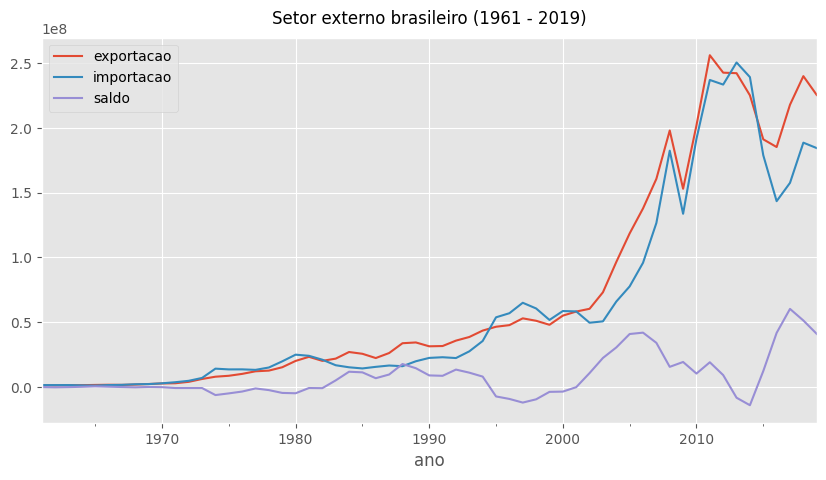

In [ ]:
# Análise da tabela historical_data com plot()
historical_data.plot(figsize = (10, 5)) # figsize para tamanho da imagem
plt.title('Setor externo brasileiro (1961 - 2019)',
          fontsize = 12, pad = 10); # fontsize, tamanho da fonte
                                   # pad, espaço entre o título e o gráfico

## 5.1 Análise do saldo comercial brasileiro

In [ ]:
# Análise do saldo comercial brasileiro com Plotly
fig =  go.Figure()

fig.add_trace(
    go.Scatter(
        x = historical_data.index,
        y = historical_data['saldo']
    )
)

fig.update_layout(
    title = 'Saldo comercial',
    plot_bgcolor = 'white'
)

In [ ]:
go.Figure().add_trace(
    go.Scatter(
         x = historical_data.index,
        y = historical_data['saldo']
    )

)



## 5.2 Evolução das exportações brasileiras (1997 - 2020)

Dados da COMEXSTAT

In [ ]:
# Dados de exportação agrupados e, após isso, somados por ano | groupby().sum()
br_export = export_data.groupby(by = ['ano'])['valor'].sum()

In [ ]:
br_export.head()

ano
1997    52947495532
1998    51076603549
1999    47945909310
2000    54993159648
2001    58032294243
Name: valor, dtype: int64

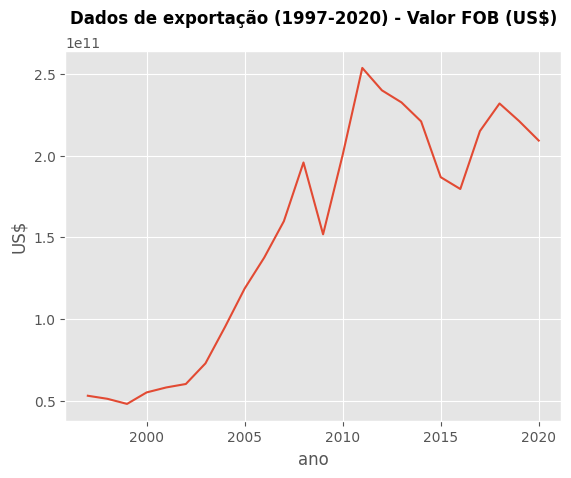

In [ ]:
# Verificando os dados com .plot()
br_export.plot()
plt.title('Dados de exportação (1997-2020) - Valor FOB (US$)',
          fontweight = 'bold',
          fontsize = 12,
          pad = 20)

plt.xlabel('ano')
plt.ylabel('US$');

## 5.3 Principais produtos exportados pelo Brasil em 2020

In [ ]:
# Difinindo dados apenas do ano de 2020
export_data.query('ano == 2020')

,ano,UF,SH2,SH2_detalhe,valor,UF_code
0,2020,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",17571575741,RJ
1,2020,Pará,26,"Minerios, escórias e cinzas",16311755239,PA
2,2020,Minas Gerais,26,"Minerios, escórias e cinzas",9897540340,MG
3,2020,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",7701252124,MT
4,2020,São Paulo,17,Açúcares e produtos de confeitaria,5538979962,SP
...,...,...,...,...,...,...
1902,2020,Minas Gerais,66,"Guarda-chuvas, sombrinhas, guarda-sóis, bengal...",3,MG
1903,2020,Mato Grosso,32,Extratos tanantes e tintoriais; taninos e seus...,2,MT
1904,2020,Amapá,54,Filamentos sintéticos ou artificiais,2,AP
1905,2020,Não Declarada,30,Produtos farmacêuticos,0,NaN


In [ ]:
# Dados de 2020 agrupados pela coluna SH2 e somado os valores dos anos
# Filtrados em ordem descendete
export_data.query('ano == 2020').groupby(by = 'SH2')['valor'].sum()\
.sort_values(ascending = False)

SH2
12    29043102272
26    28893262141
27    24872571554
2     15821674276
17     8887159174
         ...     
92        4072817
67        1992810
46         315421
66         286202
45         221241
Name: valor, Length: 96, dtype: int64

In [ ]:
# Verificando o produto mais exportado
export_data.query('SH2 == 12')['SH2_detalhe'].unique()

array(['Sementes e frutos oleaginosos; grãos, sementes e frutos diversos; plantas industriais ou medicinais; palhas e forragens'],
      dtype=object)

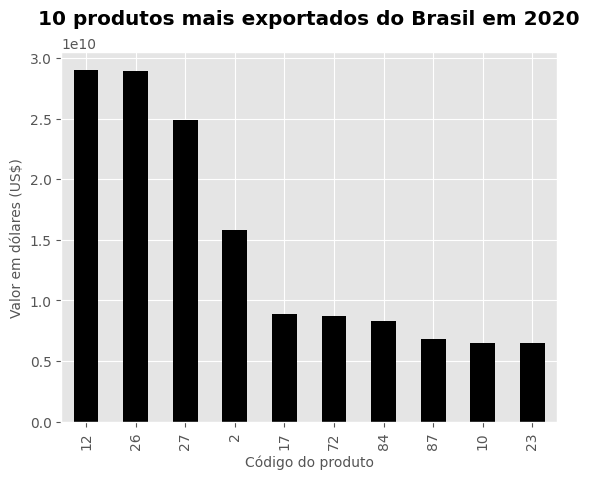

In [ ]:
# Visualizando os 10 produtos mais exportados com .plot()
export_data.query('ano == 2020').groupby(by = 'SH2')['valor'].sum()\
.sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'black')

# Título do gráfico
plt.title('10 produtos mais exportados do Brasil em 2020', fontweight = 'bold',
          pad = 20)

# Descrição dos eixos (labels)
plt.xlabel('Código do produto', fontsize = 10)
plt.ylabel('Valor em dólares (US$)', fontsize = 10);

# 6.Análise das exportações estaduais

In [ ]:
# Definindo uma variável com a soma da exportação por estado com a tabela export_data
# filtrando os dados apenas de 2020

export_uf_2020 = export_data\
.reset_index(drop = True)\
.query('ano == 2020')\
.groupby(by = 'UF')['valor'].sum()\
.sort_values()

In [ ]:
export_uf_2020

UF
Acre                      33955033
Sergipe                   39270641
Paraíba                  125273386
Distrito Federal         174176503
Roraima                  196840242
Amapá                    312166656
Rio Grande do Norte      340719630
Alagoas                  418186466
Piauí                    583955578
Amazonas                 786717887
Não Declarada           1106592830
Tocantins               1368260149
Rondônia                1371865935
Pernambuco              1578868588
Ceará                   1853417875
Maranhão                3371175320
Espírito Santo          4962898514
Mato Grosso do Sul      5822414859
Bahia                   7838201715
Santa Catarina          8127704094
Goiás                   8133811970
Rio Grande do Sul      14059629221
Paraná                 16255783066
Mato Grosso            18231913879
Pará                   20611770877
Rio de Janeiro         22629713563
Minas Gerais           26319148236
São Paulo              42525808942
Name: valor, dtyp

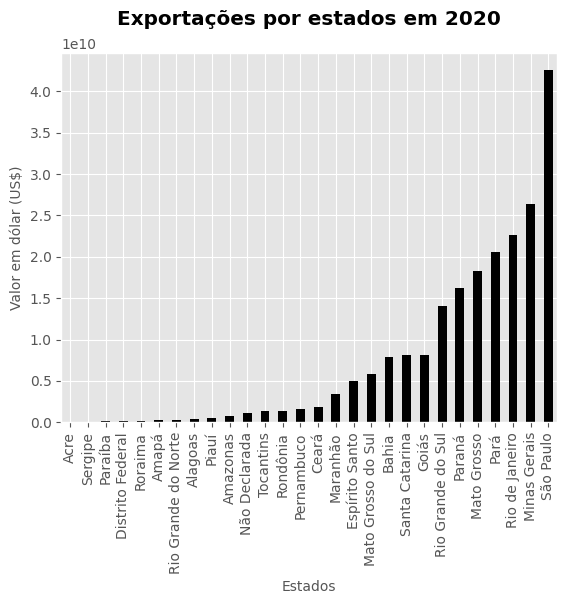

In [ ]:
# Gráfico em barras da tabela export_uf_2020
export_uf_2020.plot(kind = 'bar', color = 'black')

# Título
plt.title('Exportações por estados em 2020', fontweight = 'bold',
          pad = 20)

# Descrição dos eixos (labels)
plt.xlabel('Estados', fontsize = 10)
plt.ylabel('Valor em dólar (US$)', fontsize = 10);

In [ ]:
# Definindo a variável year para ser usada nos códigos abaixo

year = 2020

In [ ]:
# Definindo a variável market_share_by_year por ano, agrupados pelo valor total de exportação
# por estados

market_share_by_year = export_data.sort_values(['ano', 'SH2'])\
.reset_index(drop = True)\
.query(f'ano == {year}')\
.groupby(by = ['UF', 'UF_code'])['valor'].sum()\
.sort_values()

In [ ]:
market_share_by_year

UF                   UF_code
Acre                 AC            33955033
Sergipe              SE            39270641
Paraíba              PB           125273386
Distrito Federal     DF           174176503
Roraima              RR           196840242
Amapá                AP           312166656
Rio Grande do Norte  RN           340719630
Alagoas              AL           418186466
Piauí                PI           583955578
Amazonas             AM           786717887
Tocantins            TO          1368260149
Rondônia             RO          1371865935
Pernambuco           PE          1578868588
Ceará                CE          1853417875
Maranhão             MA          3371175320
Espírito Santo       ES          4962898514
Mato Grosso do Sul   MS          5822414859
Bahia                BA          7838201715
Santa Catarina       SC          8127704094
Goiás                GO          8133811970
Rio Grande do Sul    RS         14059629221
Paraná               PR         16255783066
Mat

In [ ]:
# Transformando a varíavel market_share_by_year em um padas DataFrame

data = pd.DataFrame(market_share_by_year).reset_index()
data

,UF,UF_code,valor
0,Acre,AC,33955033
1,Sergipe,SE,39270641
2,Paraíba,PB,125273386
3,Distrito Federal,DF,174176503
4,Roraima,RR,196840242
5,Amapá,AP,312166656
6,Rio Grande do Norte,RN,340719630
7,Alagoas,AL,418186466
8,Piauí,PI,583955578
9,Amazonas,AM,786717887


##  6.1 Tabela data

In [ ]:
# Criando o campo market_share no dataframe data, com a participação (marke share) de cada estado nas exportações
# brasileiras em porcentagem

data['market_share'] = (data.valor / data.valor.sum() * 100).round(2) # round(2) - duas casas decimais
data

,UF,UF_code,valor,market_share
0,Acre,AC,33955033,0.02
1,Sergipe,SE,39270641,0.02
2,Paraíba,PB,125273386,0.06
3,Distrito Federal,DF,174176503,0.08
4,Roraima,RR,196840242,0.09
5,Amapá,AP,312166656,0.15
6,Rio Grande do Norte,RN,340719630,0.16
7,Alagoas,AL,418186466,0.20
8,Piauí,PI,583955578,0.28
9,Amazonas,AM,786717887,0.38


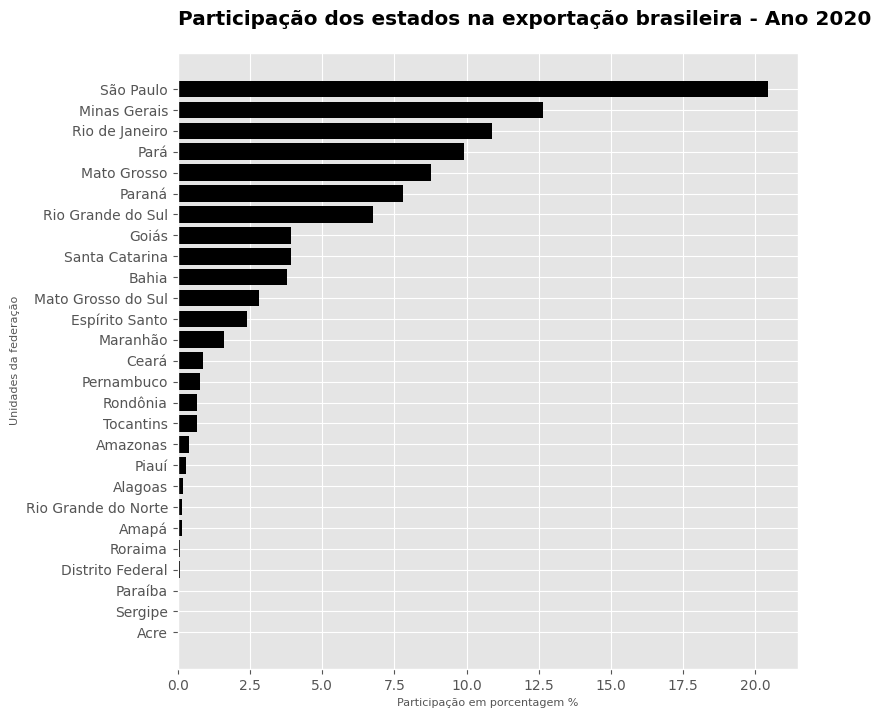

In [ ]:
# Visualizando data com gráfico de barras horizontal

# Tamanho da figura
plt.figure(figsize = (8, 8))

# Plot da figura com plt.barh()
plt.barh(
    data = data, # base de dados
    y = 'UF', # eixo Y (estados)
    width = 'market_share', # eixo x (valor do market share)
    color = 'black' # cor das barras
)

# Título da figura
plt.title(f'Participação dos estados na exportação brasileira - Ano {year}',
          fontweight = 'bold', loc = 'left', pad = 20)

# Descrição dos eixos (labels)
plt.xlabel('Participação em porcentagem %', fontsize = 8)
plt.ylabel('Unidades da federação', fontsize = 8);

# 7.Visualização espacial dos dados

In [ ]:
# Pegando as geometrias dos estados utilizando a função .read_state() do geobr - pacote do IBGE
estados = geobr.read_state(year = 2020)

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in S

## 7.1 Tabela estados

In [ ]:
estados.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


In [ ]:
# Informações da variável estados
estados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_state    27 non-null     float64 
 1   abbrev_state  27 non-null     object  
 2   name_state    27 non-null     object  
 3   code_region   27 non-null     float64 
 4   name_region   27 non-null     object  
 5   geometry      27 non-null     geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.4+ KB


O pacote descartes é necessário para plotar polígonos em geopandas

In [ ]:
# Instalando a biblioteca descartes
!pip install descartes

In [ ]:
# Importando bibliotecas para não aparecer erros na visualização do mapa usando geobr

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

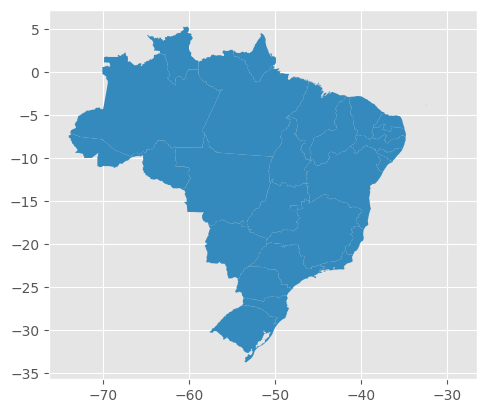

In [ ]:
# Visualizando a variável estados com .plot()
estados.plot();

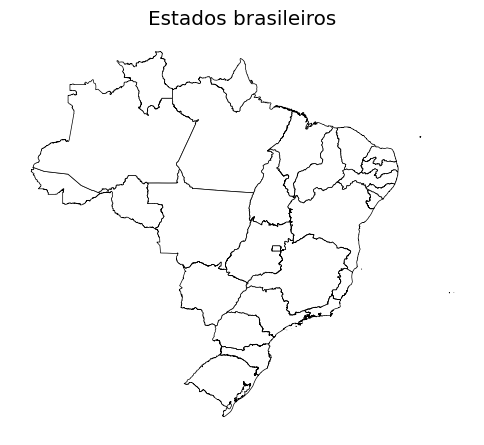

In [ ]:
# Visualizando a variável estados com plt.subplots() e .plot()

# Definindo imagem do fundo(fig), eixo (ax) e tamanho da figura
fig, ax = plt.subplots(figsize = (6, 6))

# Plot com fundo branco e contorno do mapa em preto
estados.plot(facecolor = 'white', ax = ax, edgecolor = 'black')

# Título da figura
ax.set_title('Estados brasileiros')

# Desativando a visualização dos eixos
ax.axis('off');

In [ ]:
# Utilizando a função pd.merge() para concatenar, lado a lado, as tabelas 'estados' e 'data'
# Foi utilizado os campos 'abbrev_state', da tabela estados, e 'UF_code', da tabela data, para
# definir o critério de junção das linhas

merged_data = pd.merge(
    estados,
    data,
    left_on = 'abbrev_state',
    right_on = 'UF_code',
    how = 'inner'
)

merged_data.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry,UF,UF_code,valor,market_share
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",Rondônia,RO,1371865935,0.66
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",Acre,AC,33955033,0.02
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",Amazonas,AM,786717887,0.38
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",Roraima,RR,196840242,0.09
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",Pará,PA,20611770877,9.91


In [ ]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_state    27 non-null     float64 
 1   abbrev_state  27 non-null     object  
 2   name_state    27 non-null     object  
 3   code_region   27 non-null     float64 
 4   name_region   27 non-null     object  
 5   geometry      27 non-null     geometry
 6   UF            27 non-null     object  
 7   UF_code       27 non-null     object  
 8   valor         27 non-null     int64   
 9   market_share  27 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 2.3+ KB


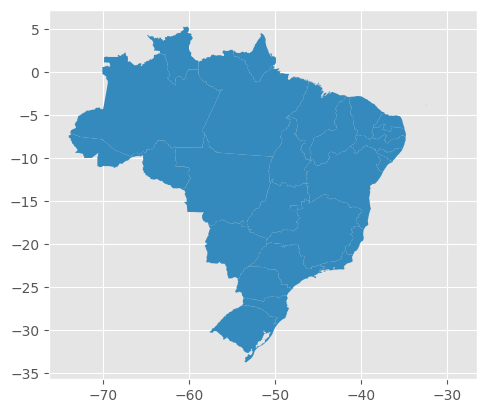

In [ ]:
merged_data.plot();

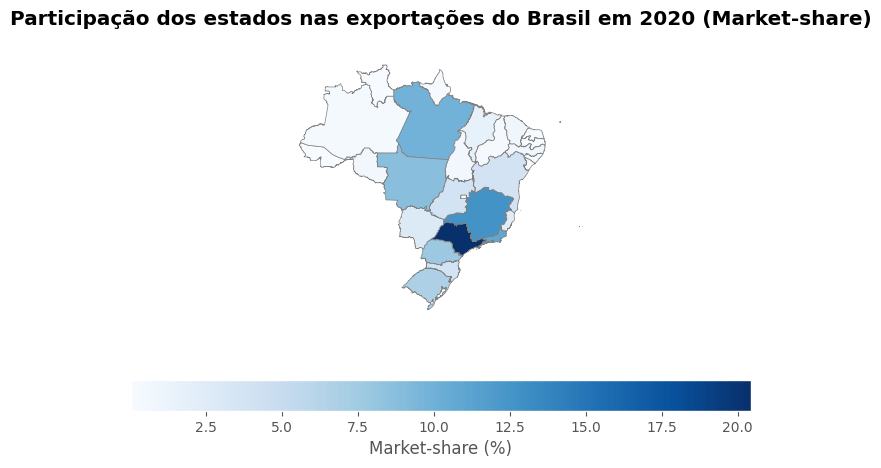

In [ ]:
# Visualizando a variável merged_data com plt.subplots() e .plot()

# Definindo imagem do fundo(fig), eixo (ax) e tamanho da figura
fig, ax = plt.subplots(figsize = (8, 5))

merged_data.plot(
    column = 'market_share', # campo utilizado para fazer o gradiente de cores
    cmap = 'Blues', # paleta de cores
    ax = ax, # definição do eixo (imagem)
    legend = True, # ativando a legenda
    edgecolor = 'gray', # cor das bordas do mapa
    legend_kwds = {
        'label': 'Market-share (%)', # descrição da legenda
        'orientation': 'horizontal' # definindo a legenda na horizontal
    }
)

# Título do gráfico
ax.set_title(f'Participação dos estados nas exportações do Brasil em {year} (Market-share)',
             fontweight = 'bold', pad = 20)

# Desativando a visualização dos eixos
ax.axis('off');


# 8.Market-share por estado

Comparação dos anos de 1997 a 2020

In [ ]:
export_data.head()

,ano,UF,SH2,SH2_detalhe,valor,UF_code
0,2020,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",17571575741,RJ
1,2020,Pará,26,"Minerios, escórias e cinzas",16311755239,PA
2,2020,Minas Gerais,26,"Minerios, escórias e cinzas",9897540340,MG
3,2020,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",7701252124,MT
4,2020,São Paulo,17,Açúcares e produtos de confeitaria,5538979962,SP


In [ ]:
# Difinindo uma função que calcula o market-share dos estados por ano selecionado

def get_market_share_by_year(year:int):
	"Calcula o market-share nas exportações para um ano selecionado"

	# calcula o valor exportado por cada estado no ano selecionado
	market_share_by_year = export_data.sort_values(['ano', 'SH2'])\
	.reset_index(drop = True)\
	.query(f'ano == {year}')\
	.groupby(by = 'UF')['valor'].sum()\
	.sort_values()

	# armazena o resultado em um Dataframe
	data = pd.DataFrame(market_share_by_year).reset_index()

	# cálculo do market-share
	data['market_share'] = (data.valor/data.valor.sum()*100).round(2)
	data['year'] = year

	return data

In [ ]:
# Testando a função
get_market_share_by_year(2019)


,UF,valor,market_share,year
0,Acre,32853264,0.01,2019
1,Sergipe,50561717,0.02,2019
2,Paraíba,126300492,0.06,2019
3,Roraima,157707419,0.07,2019
4,Distrito Federal,160700979,0.07,2019
5,Amapá,261368366,0.12,2019
6,Alagoas,319088996,0.14,2019
7,Rio Grande do Norte,394853818,0.18,2019
8,Piauí,542832671,0.25,2019
9,Amazonas,731092564,0.33,2019


In [ ]:
# Definindo dicionários titles e anos para ser usado no laço for abaixo
titles = ['Ano - 1997',
          'Ano - 2020']

anos = [1997, 2020]

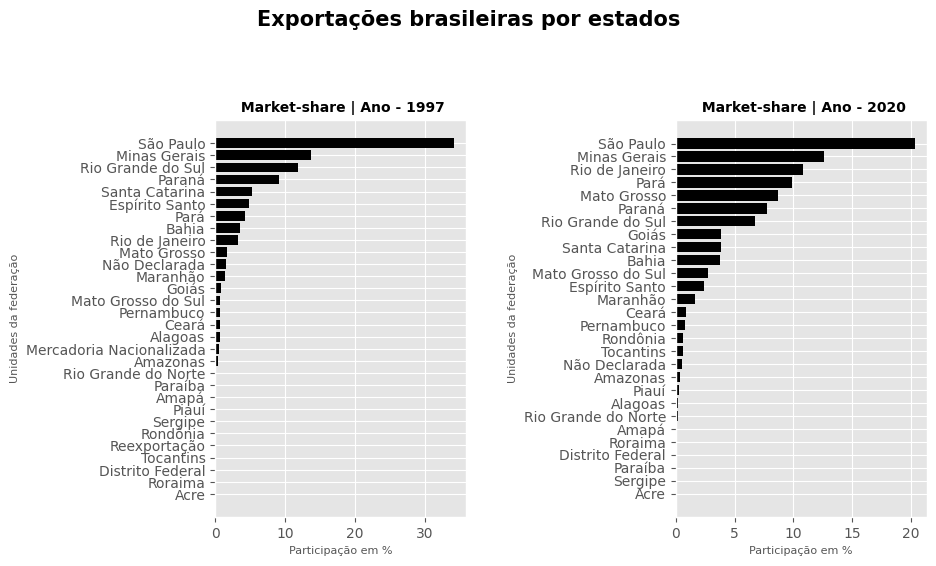

In [ ]:
# Subplots com 1 linha e duas colunas
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
fig.suptitle('Exportações brasileiras por estados', # Título principal
             fontsize = 15, fontweight = 'bold')

# Laço for para automatizar a criação dos gráficos
for index, ano in enumerate(anos):
  market_share = get_market_share_by_year(ano)
  ax[index].barh(
      data = market_share, # tabela
      width = 'market_share', # eixo x
      y = 'UF', # eixo y
      color = 'black' # cor das barras
  )
  ax[index].set_title(f' Market-share | {titles[index]}', # título do gráficos
                      fontsize = 10, fontweight = 'bold')
  ax[index].set_xlabel('Participação em %', fontsize = 8) # label do eixo x
  ax[index].set_ylabel('Unidades da federação', fontsize = 8) # label do eixo y


fig.tight_layout(pad = 3); # ajuste da distância entre os gráficos

In [ ]:
export_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41853 entries, 0 to 41852
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano          41853 non-null  int64 
 1   UF           41853 non-null  object
 2   SH2          41853 non-null  int64 
 3   SH2_detalhe  41853 non-null  object
 4   valor        41853 non-null  int64 
 5   UF_code      36192 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.9+ MB


# 9.Top 10 das exportações por estado

In [ ]:
# Definição de variáveis para filtrar estado e ano

estado = 'Rio de Janeiro'
ano = 2000

In [ ]:
# Script para selecionar o top 10 das exportações por estado e ano

export_estado = export_data.query(f'(UF == "{estado}") & (ano == {ano})')\
.groupby(by = ['SH2_detalhe'])['valor'].sum()\
.sort_values(ascending = False)\
.head(10)

export_estado = pd.DataFrame(export_estado)
print(f'Top 10 das exportações | {estado} | {ano}')
export_estado

Top 10 das exportações | Rio de Janeiro | 2000


,valor
SH2_detalhe,
"Ferro fundido, ferro e aço",397604132
"Combustíveis minerais, óleos minerais e produtos da sua destilação; matérias betuminosas; ceras minerais",304283228
Transações especiais,228715382
"Instrumentos e aparelhos de óptica, de fotografia, de cinematografia, de medida, de controle ou de precisão; instrumentos e aparelhos médico-cirúrgicos; suas partes e acessórios",111351447
Borracha e suas obras,96899269
Produtos químicos orgânicos,91465540
"Reatores nucleares, caldeiras, máquinas, aparelhos e instrumentos mecânicos, e suas partes",64316755
Produtos diversos das indústrias químicas,53766414
Alumínio e suas obras,51575935


# 10.Quantidade de produtos exportados por estado

In [ ]:
# Definição da variável para filtrar o ano no script abaixo

ano = 2020

In [ ]:
# Script para contar a variedade de produtos de exportação por estado filtrado por ano

export_var = export_data.query(f'ano == {ano}')\
.groupby(by = ['UF'])['SH2'].count()\
.sort_values(ascending = False)

export_var

UF
Paraná                 96
São Paulo              96
Rio de Janeiro         96
Rio Grande do Sul      96
Santa Catarina         95
Minas Gerais           92
Bahia                  85
Espírito Santo         84
Maranhão               80
Pará                   79
Pernambuco             78
Ceará                  78
Goiás                  78
Amazonas               75
Mato Grosso do Sul     70
Alagoas                67
Roraima                65
Amapá                  63
Distrito Federal       61
Rondônia               60
Rio Grande do Norte    52
Mato Grosso            51
Paraíba                41
Sergipe                40
Piauí                  40
Acre                   36
Tocantins              30
Não Declarada          23
Name: SH2, dtype: int64

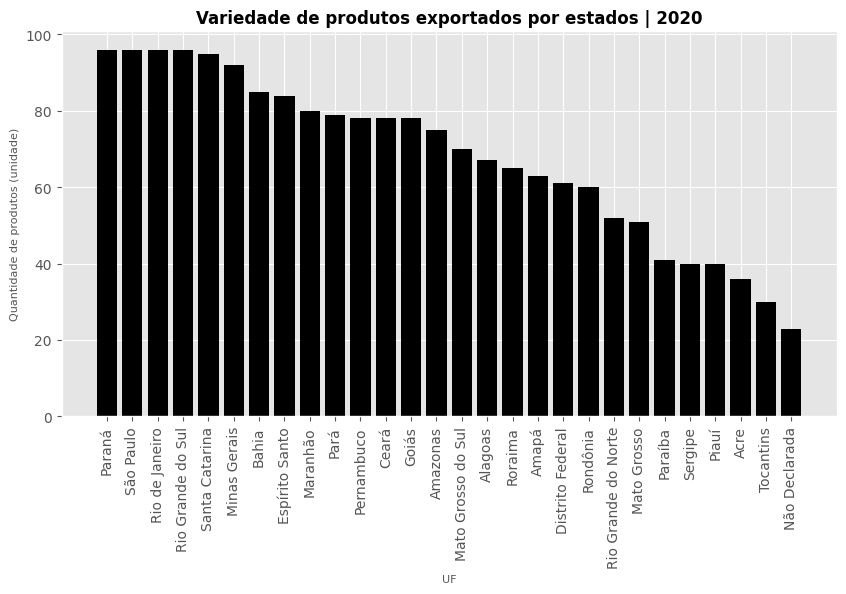

In [ ]:
# Visualizando a tabela acima com o gráfico de barras plt.bar()

# Tamanho da figura
plt.figure(figsize = (10, 5))

# Título
plt.title(f'Variedade de produtos exportados por estados | {ano}',
          fontsize = 12, fontweight = 'bold')

# Plot
plt.bar(
    x = export_var.index,
    height = export_var.values,
    color = 'black'
)

# Labels (rótudos dos eixos)
plt.xlabel('UF', fontsize = 8)
plt.ylabel('Quantidade de produtos (unidade)', fontsize = 8)

# Ângulo de inclinação do label do eixo x
plt.xticks(rotation = 90);



# 11.Participação dos estados nas exportações brasileiras (market-share)

In [ ]:
market_share[-10:]

,UF,valor,market_share,year
18,Bahia,7838201715,3.75,2020
19,Santa Catarina,8127704094,3.89,2020
20,Goiás,8133811970,3.89,2020
21,Rio Grande do Sul,14059629221,6.72,2020
22,Paraná,16255783066,7.77,2020
23,Mato Grosso,18231913879,8.72,2020
24,Pará,20611770877,9.85,2020
25,Rio de Janeiro,22629713563,10.82,2020
26,Minas Gerais,26319148236,12.58,2020
27,São Paulo,42525808942,20.33,2020


In [ ]:
# Visualizando a tabela acima com px.scatter

# Armazenando o plot na variável fig
fig = px.scatter(
    market_share[-10:], # tabela referência filtrando apenas as ultimas dez linhas
    x = 'market_share', # dados no eixo x
    y = 'UF', # dados no eixo y
    title = 'TOP 10 dos estados nas exportações brasileiras| Market-share | 2020', # título
    labels = {'market_share': 'Market-share em %'} # label eixo x

)

# Atualizações no plot
fig.update_layout(
    xaxis = dict(
        showgrid = False, # retirando as linhas do eixo x
        showline = True,  # definindo linha acima do label do eixo x
        linecolor = 'lightgray' # cor da linha
    ),
    yaxis = dict(
        showgrid = False, # retirando as linhas do eixo y
        showline = True, # definindo linha ao lado do label do eixo y
        linecolor = 'lightgray' # cor da linha
    ),
    plot_bgcolor = 'white' # cor de fundo
)

# Cor da marcação dos pontos
fig.update_traces(marker_color = 'grey')
fig.show()

Visualizando os cinco estados brasileiros com maior market-share no gráfico de pizza



In [ ]:
# verificando os cinco últimos registro da tabela gerada pela função get_market_share_by_year (maiores market_share)
get_market_share_by_year(2020)[-5:]

,UF,valor,market_share,year
23,Mato Grosso,18231913879,8.72,2020
24,Pará,20611770877,9.85,2020
25,Rio de Janeiro,22629713563,10.82,2020
26,Minas Gerais,26319148236,12.58,2020
27,São Paulo,42525808942,20.33,2020


In [ ]:
# definindo a variável ano para ser usada no gráfico de pizza
year = 2020

In [ ]:
# plot em gráfico de pizza px.pie()

fig = px.pie(data_frame = get_market_share_by_year(year)[-5:], # cinco últimos registros
             values = 'market_share', # valores calculados no gráfico
             names = 'UF', # nome das 'fatias'
             hole = 0.4, # diâmetro do tamanho interno da 'pizza'
             title = f'Participações dos 5 maiores estados exportadores do Brasil no ano de {year}' # título
)

fig.update_traces(textposition = 'inside', textinfo = 'percent+label') # definindo o label dentro do gráfico e adicionando a porcentagem
fig.show()

# 12.Cálculo do market-share de todos os anos por estado

In [ ]:
# tabela que será usada para o cálculo
export_data

,ano,UF,SH2,SH2_detalhe,valor,UF_code
0,2020,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",17571575741,RJ
1,2020,Pará,26,"Minerios, escórias e cinzas",16311755239,PA
2,2020,Minas Gerais,26,"Minerios, escórias e cinzas",9897540340,MG
3,2020,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",7701252124,MT
4,2020,São Paulo,17,Açúcares e produtos de confeitaria,5538979962,SP
...,...,...,...,...,...,...
41848,1997,Maranhão,96,Obras diversas,11,MA
41849,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,CE
41850,1997,Santa Catarina,45,Cortiça e suas obras,9,SC
41851,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9,SC


In [ ]:
# criando uma função para pegar todos os anos, estados e market-share

def get_market_share_for_all_years():
  'Efetua o cálculo do market-share dos estados para todos os anos selecionados'

  # lista de anos
  years = export_data.ano.unique()

  # dataframe vazio para concatenar posteriormente
  result_market_share = pd.DataFrame()

  # para cada ano faz o cálculo de market-share
  for i in years:
    market_share_by_year = export_data.sort_values(['ano', 'SH2'])\
    .reset_index(drop = True)\
    .query(f'ano == {i}')\
    .groupby(by = 'UF')['valor'].sum()\
    .sort_values()

    # encapsulando o for acima na variável data
    data = pd.DataFrame(market_share_by_year).reset_index()

    # adicionando uma coluna com o cálculo do market-share
    data['market-share'] = (data.valor / data.valor.sum() * 100).round(2)

    # adicionado uma coluna com os anos
    data['year'] = i


    # concatenando as tabelas data, uma em baixo da outra, no dataframe result_market_share
    result_market_share = pd.concat([result_market_share, data])

  return result_market_share

In [ ]:
# executando a função get_market_share_for_all_years() e encapsulando na variável get_market_share_for_all_years

get_market_share_for_all_years = get_market_share_for_all_years()

In [ ]:
# dataframe dos market-share com todos os anos e estados gerados a partir da função get_market_share_for_all_years()
get_market_share_for_all_years

,UF,valor,market-share,year
0,Acre,33955033,0.02,2020
1,Sergipe,39270641,0.02,2020
2,Paraíba,125273386,0.06,2020
3,Distrito Federal,174176503,0.08,2020
4,Roraima,196840242,0.09,2020
...,...,...,...,...
25,Santa Catarina,2801706307,5.29,1997
26,Paraná,4849631130,9.16,1997
27,Rio Grande do Sul,6267496953,11.84,1997
28,Minas Gerais,7217634839,13.63,1997
